# Forecasting Sticker Sales

## 1. Datasets and EDA

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

df = pd.read_csv(utils.TRAIN_PATH)
df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


My first thought is that this might be a time-series problem. The evidence is that we have the `date` column spanned from 2010 - 2016. Let see how many distinct dates are there in the datasets.

In [8]:
df["date"].describe()

count         230130
unique          2557
top       2016-12-31
freq              90
Name: date, dtype: object

In [14]:
print(df["date"].unique().tolist())

['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-01-30', '2010-01-31', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-06', '2010-02-07', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-13', '2010-02-14', '2010-02-15', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-20', '2010-02-21', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-02-27', '2010-02-28', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-06', '2010-03-07', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010

In [16]:
df["date"].value_counts()

date
2016-12-31    90
2010-01-01    90
2010-01-02    90
2010-01-03    90
2010-01-04    90
              ..
2010-02-02    90
2010-02-03    90
2010-02-04    90
2010-02-05    90
2010-02-06    90
Name: count, Length: 2557, dtype: int64

It seems like our dataset is recorded daily at frequency of 90 records per day.

In [17]:
df["country"].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [21]:
df["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [19]:
df["product"].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

<Axes: >

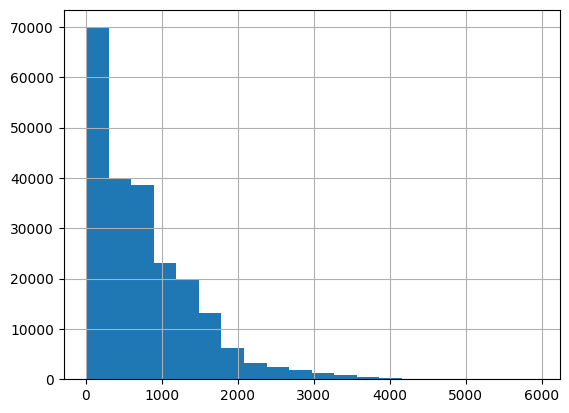

In [29]:
df["num_sold"].hist(bins=20)

So the dataset is recorded daily with: `5 products` $\times$ `3 stores` $\times$ `6 countries` = `90 records`
Our task is to predict `num_sold` columns. There are some approaches here I could think of:
1. Basic ML models, with `store` included as a feature column.
2. Build 3 seperated time-series models for each store (this has more potential)
3. But based on the second bullet points above, I can totally build 90 models for each type of product in each store and in each country. Each model is now a very simple time-series model.

In this project, I will try method 2 and 3.